<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os

In [2]:
realty = pd.read_csv('/Users/karter/Projects/2_real_estate_data/real_estate_data.csv', sep ='\t')
display(realty.info())
realty

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

None

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [3]:
realty.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Описание данных

* `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
* `balcony` — число балконов
* `ceiling_height` — высота потолков (м)
* `city_centers_nearest` — расстояние до центра города (м)
* `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
* `first_day_exposition` — дата публикации
* `floor` — этаж
* `floors_total` — всего этажей в доме
* `apartment` — апартаменты (булев тип)
* `kitchen_area` — площадь кухни в квадратных метрах (м²)
* `last_price` — цена на момент снятия с публикации
* `living_area` — жилая площадь в квадратных метрах (м²)
* `locality_name` — название населённого пункта
* `open_plan` — свободная планировка (булев тип)
* `parks_around_3000` — число парков в радиусе 3 км
* `parks_nearest` — расстояние до ближайшего парка (м)
* `ponds_around_3000` — число водоёмов в радиусе 3 км
* `ponds_nearest` — расстояние до ближайшего водоёма (м)
* `rooms` — число комнат
* `studio` — квартира-студия (булев тип)
* `total_area` — площадь квартиры в квадратных метрах (м²)
* `total_images` — число фотографий квартиры в объявлении

In [4]:
realty = realty.rename(
columns={
'is_apartment': 'apartment',
'cityCenters_nearest': 'city_centers_nearest',
'parks_around3000': 'parks_around_3000',
'ponds_around3000' : 'ponds_around_3000' }
)
realty.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Привел в порядок названия столбцов

In [5]:
realty.duplicated().sum()

0

Явных дублей не найдено.

In [6]:
realty.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
apartment               20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [7]:
realty['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Пропуски в колонке высота потолков вызвана скорее всего тем что не все знают реальную высотку потолка в их квартире. Есть аномально низкие и аномально высокие показатели такие как 1 метр и 100 метров. По средниму и медианному показателю похоже на правду.

In [8]:
realty['floors_total'].describe()

count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

Количество пропусков в столбце всего этажей в доме крайне мало, пропуски вызваны скорее всего ошибкой при вводе.

In [9]:
realty['living_area'].describe()

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

Количество пропусков в столбце жилая площадь не велико, пропущены значения скорее всего потому что люди не знюат точную жилую площадь и оно не обязательно для заполнения объявления.Есть аномально маленькое значение, 2 кв.м. 

In [10]:
display(realty['apartment'].unique())
realty['apartment'].value_counts()

array([nan, False, True], dtype=object)

False    2725
True       50
Name: apartment, dtype: int64

Очень много пропусков в столбце апартаменты, запросив подсчет каждого значение мы вяснили что в столбце только 50 апартаментов, остальные или не апратаменты или значение пропущено. Скорее всего пропуски допущены потому что не все пользователи понимают отличие апартаментов от квартирыи просто пропускали поле для заполнения. 






In [11]:
realty['kitchen_area'].describe()

count    21421.000000
mean        10.569807
std          5.905438
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

Количество пропусков в столбце площадь кухни не велико, пропущены значения скорее всего потому что люди не знюат точную жилую площадь и оно не обязательно для заполнения объявления.Есть аномально маленькое значение, 1.3 кв.м. возможно жти значения относят к студиям где сложно разделить жилую площадь и площадь кухни.

In [12]:
realty['balcony'].describe()

count    12180.000000
mean         1.150082
std          1.071300
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          5.000000
Name: balcony, dtype: float64

Пропуски в столбце балконы допущены вероятно при заполнении объявлений, в квартирах где нет балконов просто не указывали наличие или отсуствие.

In [13]:
realty['locality_name'].describe()

count               23650
unique                364
top       Санкт-Петербург
freq                15721
Name: locality_name, dtype: object

Большинство квартира находится в Санкт-Петербург, но так же есть еще в 364 разлчных населенных пунктах.


In [14]:
realty['airports_nearest'].describe()

count    18157.000000
mean     28793.672193
std      12630.880622
min          0.000000
25%      18585.000000
50%      26726.000000
75%      37273.000000
max      84869.000000
Name: airports_nearest, dtype: float64

Пропуский в столбце растояние до аэропорта допущены скорее всего потому что ограничен радиус поиска ближайших аэропортов. Есть аномально низкие значения например 0 метров, врятли какая то квартира находит прям в аэропорту.

In [15]:
realty['city_centers_nearest'].describe()

count    18180.000000
mean     14191.277833
std       8608.386210
min        181.000000
25%       9238.000000
50%      13098.500000
75%      16293.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

Могу предположить что за центр города взят цент Санкт-Петербурга, поэтому пропуски в столбце растояние до центра города допущены скорее всего потому что некотрые населенные пункты могут быть дальше радиуса поиска.

In [16]:
realty['parks_around_3000'].describe()

count    18181.000000
mean         0.611408
std          0.802074
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: parks_around_3000, dtype: float64

Немного странные значение в стобце парки в радиусе 3000 метров, было бы интересно посмотреть на график ящик с усами, так как медианое значение 0, а 3 квартиль 1, могу предополжиь что у больштнсва нет парков окколо дома, а у некотрых сразу 3.

In [17]:
realty['parks_nearest'].describe()

count    8079.000000
mean      490.804555
std       342.317995
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

Пропуски в столбце растояние до парка скорее всего просто не заполнили. Есть аномально маленькое значение, врят ли есть квартира которая находится в 1 метре от парка.

In [18]:
realty['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Значения могут отсутствовать, например, по причине того, что неизвестно когда было закрыто объявление о продаже, т.е., фактически, сделка была совершена, но не была закрыта на онлайн-ресурсе. По той же причине можем получить результаты в виде срока продажи квартиры в несколько лет

### Вывод

Данные довольно "грязные", но будем искать пути решения для их максимально корректного заполнения.

## Предобработка данных

In [19]:
realty['balcony'] = realty['balcony'].fillna(0)
display('Количество NaN в столбце balcony:', realty['balcony'].isna().sum())

'Количество NaN в столбце balcony:'

0

Где данные отсутствуют, проставим нули - балкон отсутствует.

In [20]:
display('Количество NaN по airports_nearest:', realty['airports_nearest'].isna().sum())
display('Количество NaN по cityCenters_nearest:', realty['city_centers_nearest'].isna().sum())

'Количество NaN по airports_nearest:'

5542

'Количество NaN по cityCenters_nearest:'

5519

In [21]:
display('Попарно NaN в airports_nearest и в city_centers_nearest в {} строках'.
      format(realty.query('airports_nearest != airports_nearest and city_centers_nearest != city_centers_nearest').shape[0]))

'Попарно NaN в airports_nearest и в city_centers_nearest в 5518 строках'

Посмотрели, в каждой ли строке, где NaN в airports_nearest, есть NaN в city_сenters_nearest и в ponds_around_3000

In [22]:
def fillna_ceiling_height(row):
    if row < 2500:
        return 'самый центр'
    elif row < 5000:
        return 'центр'
    elif row < 17000:
        return 'в пределах города'
    elif row >= 17000:
        return 'область'

котегоризируем удаленность от центра:

0-2км от центра (категория 'самый центр');

2-5км от центра (категория 'центр');

5-17км от центра (категория 'близко');

17 < км от центра (категория 'пгт').

In [23]:
realty['centr_category'] = realty['city_centers_nearest'].apply(fillna_ceiling_height)
realty.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,centr_category
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,в пределах города
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,область
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,в пределах города
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,в пределах города
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,в пределах города


In [24]:
realty.groupby('centr_category')['ceiling_height'].mean().sort_values(ascending=False).to_frame()

,ceiling_height
centr_category,
самый центр,3.239759
центр,3.189076
в пределах города,2.744391
область,2.677288


Заполним пропуски в столбце ceiling_height средним по каждой группе center_category (кроме строк, где NaN в city_centers_nearest - там мы не можем узнать, центр это или, например, почти область, поэтому не будем трогать):

In [25]:
list_of_centr_category = ['самый центр', 'центр', 'близко к центру', 'ближе к области/область']
for column in list_of_centr_category:
    value_for_filling = realty.groupby('centr_category')['ceiling_height'].median().get(key=column)
    realty['ceiling_height'] = realty.groupby('centr_category')['ceiling_height'].apply(lambda x: x.fillna(x.median()))

In [26]:
realty['ceiling_height'] = realty.groupby('centr_category')['ceiling_height'].apply(lambda x: x.fillna(x.median()))
display(realty.head(10))
realty['ceiling_height'].isna().sum()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,centr_category
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,в пределах города
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.60,11.0,18.60,1,NaN,...,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,область
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.65,5.0,34.30,4,NaN,...,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,в пределах города
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.65,14.0,NaN,9,NaN,...,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,в пределах города
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,в пределах города
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,0.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,None
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,2.60,26.0,10.60,6,NaN,...,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,область
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,2.65,24.0,NaN,22,NaN,...,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,в пределах города
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,0.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0,None
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,в пределах города


5519

Смогли уменьшить количество пропусков почти вдвое, для лучшего резульата не хватает данных по удаленности от центра.

In [27]:
realty.query('rooms == 0')[['kitchen_area', 'living_area']].isnull().sum()

kitchen_area    197
living_area      14
dtype: int64

Проверили гипотезу что в столбцах площадь кухни и жилая площадь отосятся к студиям, тут мы видимо что лишь малая часть пропусков по этим столбцам относится к студиям. Да и с ними нам нечего делать - не делить же пополам общую площадь. Оставляем как есть.

In [28]:
print('Количество NaN по locality_name:', realty['locality_name'].isnull().sum())
realty[(realty['locality_name'].isnull())][['locality_name', 'city_centers_nearest']].head()

Количество NaN по locality_name: 49


,locality_name,city_centers_nearest
1097,NaN,4258.0
2033,NaN,NaN
2603,NaN,17369.0
2632,NaN,17369.0
3574,NaN,8127.0


Проверим, есть ли данные по расстоянию от центра города, чтоб хотя бы предположить, что эта квартира находится в пределах Санкт-Петербурга

In [29]:
realty.loc[(realty['locality_name'].isnull()) & (realty['city_centers_nearest'] < 10000), 'locality_name'] = realty.loc[(realty['locality_name'].isnull()) & (realty['city_centers_nearest'] < 10000), 'locality_name'].fillna('Санкт-Петербург')

In [30]:
print('Количество NaN по locality_name:', realty['locality_name'].isnull().sum())

Количество NaN по locality_name: 24


Заполнили немного пропусков названиях населенных пунктов

* `last_price` - в целочисленный тип (нам не нужны копейки в цене);
* `total_area` - округлим до 1го знака после запятой (всё-таки это квадратные метры, можно и за десятые побороться);
* `first_day_exposition` - даты в datetime;
* `ceiling_height` - округлим до 1го знака после запятой (всё-таки это высота потолков, можно и за десятые побороться);
* `floors_total, balcony` - ну где вы видели нецелочисленное количество этажей? На int;
* `living_area, kitchen_area` - туда же к иcтории про площадь и высоту потолков, т.е. до 1 знака после запятой
* `airports_nearest, city_centers_nearest, parks_around_3000, parks_nearest, ponds_around_3000, ponds_nearest` - все расстояния указаны в метрах, переводим в целочисленный формат
* `days_exposition` - количество дней, как долго продавалась недвижимость. Естественно, в int.

In [31]:
realty['first_day_exposition'] = pd.to_datetime(realty['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

Изменяю формат столбца first_day_exposition на datetime

In [32]:
list_to_int = ['last_price', 'floors_total', 'balcony', 'airports_nearest', 
               'city_centers_nearest', 'parks_around_3000', 'parks_nearest', 
               'ponds_around_3000', 'ponds_nearest', 'days_exposition']

Список столбцов для приведения к типу int

In [33]:
for column in list_to_int:
    realty[column] = realty[realty[column].notnull()][column].astype('int')

Изменяем на тип int

In [34]:
list_to_float_1 = ['total_area', 'ceiling_height', 'living_area', 'kitchen_area']

Столбцы, где округляем данные до 1 знака после запятой

In [35]:
for column in list_to_float_1:
    realty[column] = realty[realty[column].notnull()][column].round(1)

Округляем до 1 знака после запятой

In [36]:
realty.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,centr_category
0,20,13000000,108.0,2019-03-07,3,2.7,16.0,51.0,8,NaN,...,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,в пределах города
1,7,3350000,40.4,2018-12-04,1,2.6,11.0,18.6,1,NaN,...,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,область
2,10,5196000,56.0,2015-08-20,2,2.6,5.0,34.3,4,NaN,...,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,в пределах города
3,0,64900000,159.0,2015-07-24,3,2.6,14.0,NaN,9,NaN,...,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,в пределах города
4,2,10000000,100.0,2018-06-19,2,3.0,14.0,32.0,13,NaN,...,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,в пределах города
5,10,2890000,30.4,2018-09-10,1,NaN,12.0,14.4,5,NaN,...,0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,None
6,6,3700000,37.3,2017-11-02,1,2.6,26.0,10.6,6,NaN,...,1,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,область
7,5,7915000,71.6,2019-04-18,2,2.6,24.0,NaN,22,NaN,...,2,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,в пределах города
8,20,2900000,33.2,2018-05-23,1,NaN,27.0,15.4,26,NaN,...,0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0,None
9,18,5400000,61.0,2017-02-26,3,2.5,9.0,43.6,7,NaN,...,2,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,в пределах города


## Расчёты и добавление результатов в таблицу

In [37]:
realty['price_of_m2'] = realty['last_price']/realty['total_area']

Добавим столбец с ценой квадратного метра

In [38]:
realty['year'] = realty['first_day_exposition'].dt.year
realty['month'] = realty['first_day_exposition'].dt.month
realty['day'] = realty['first_day_exposition'].dt.day

Добавим год, месяц и день недели публикации объявления

In [39]:
dict_of_weekdays = {1: '1 - понедельник', 2: '2 - вторник', 3: '3 - среда', 4: '4 - четверг', 
                    5: '5 - пятница', 6: '6 - суббота', 7: '7 - воскресенье'}

Теперь создадим словарь, чтобы изменить значение с чисел на текст (напр., 'суббота')

In [40]:
realty['day'] = realty['day'].map(dict_of_weekdays)
realty['level'] = np.where(realty['floor'] == 1, 'первый', 'другой')
realty['level'] = np.where(realty['floor'] == realty['floors_total'], 'последний', realty['level'])

Добавим категорию по этажам (варианты — 'первый', 'последний', 'другой')

In [41]:
realty['living_area_part'] = realty['living_area']/realty['total_area']
realty['kitchen_area_part'] = realty['kitchen_area']/realty['total_area']
list_to_float_1 = ['living_area_part', 'kitchen_area_part']

Добавим столбцы с соотношением жилой и общей площади, а также с отношением площади кухни к общей

In [42]:
list_to_float_1 = ['living_area_part', 'kitchen_area_part']
for column in list_to_float_1:
    realty[column] = realty[realty[column].notnull()][column].round(2)

Столбцы, где округляем данные до 2 знаков после запятой

In [43]:
realty['last_price'] = (realty[realty['last_price'].notnull()]['last_price']/1000*1.0).round().astype(int)
realty['price_of_m2'] = (realty[realty['price_of_m2'].notnull()]['price_of_m2']/1000*1.0).round(3)
realty.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,apartment,...,ponds_nearest,days_exposition,centr_category,price_of_m2,year,month,day,level,living_area_part,kitchen_area_part
0,20,13000,108.0,2019-03-07,3,2.7,16.0,51.0,8,NaN,...,755.0,NaN,в пределах города,120.370,2019,3,7 - воскресенье,другой,0.47,0.23
1,7,3350,40.4,2018-12-04,1,2.6,11.0,18.6,1,NaN,...,NaN,81.0,область,82.921,2018,12,4 - четверг,первый,0.46,0.27
2,10,5196,56.0,2015-08-20,2,2.6,5.0,34.3,4,NaN,...,574.0,558.0,в пределах города,92.786,2015,8,NaN,другой,0.61,0.15
3,0,64900,159.0,2015-07-24,3,2.6,14.0,NaN,9,NaN,...,234.0,424.0,в пределах города,408.176,2015,7,NaN,другой,NaN,NaN
4,2,10000,100.0,2018-06-19,2,3.0,14.0,32.0,13,NaN,...,48.0,121.0,в пределах города,100.000,2018,6,NaN,другой,0.32,0.41


Столбец last_price приведем к тысячам, а то слишком много нулей. Ну и, соответственно, тоже самое проделаем для price_of_m2, только там оставим 3 знака после запятой.

## Исследовательский анализ данных

Изучаем следующие параметры: площадь, цена, число комнат, высота потолков.

In [44]:
realty[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe()

,total_area,last_price,rooms,ceiling_height
count,23699.000000,23699.000000,23699.000000,18180.000000
mean,60.348635,6541.548800,2.070636,2.740847
std,35.654086,10887.012837,1.078405,0.990965
min,12.000000,12.000000,0.000000,1.000000
25%,40.000000,3400.000000,1.000000,2.600000
50%,52.000000,4650.000000,2.000000,2.600000
75%,69.900000,6800.000000,3.000000,2.800000
max,900.000000,763000.000000,19.000000,100.000000


In [45]:
print('Выборка квартир в центральной зоне Санкт-Петербурга -', realty.shape[0], 'квартир')

Выборка квартир в центральной зоне Санкт-Петербурга - 23699 квартир


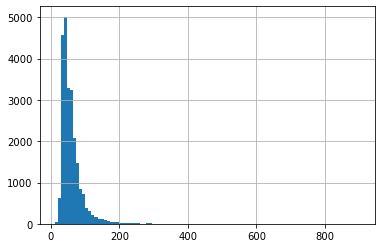

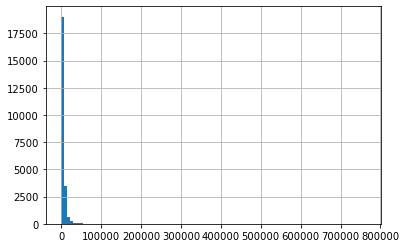

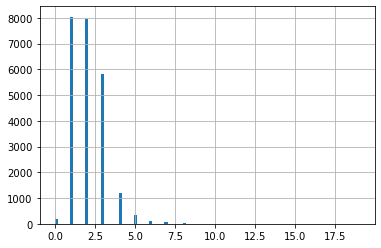

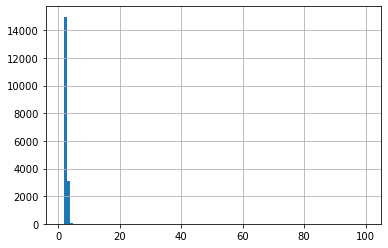

In [46]:
column_list = ['total_area', 'last_price', 'rooms', 'ceiling_height']
for columns in column_list:
    realty[columns].hist(bins=100)
    plt.show()

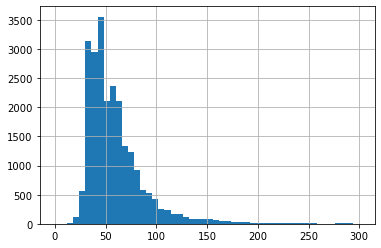

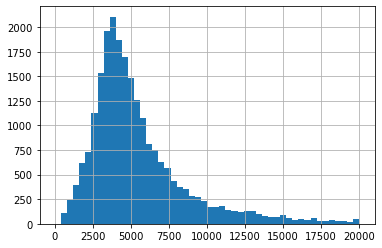

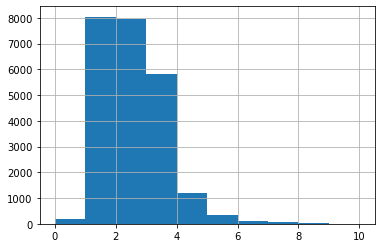

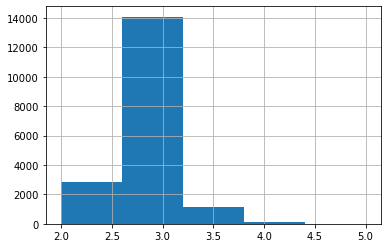

In [47]:
realty['total_area'].hist(bins=50, range=(0,300))
plt.show()
realty['last_price'].hist(bins=50, range=(0,20000))
plt.show()
realty['rooms'].hist(bins=10, range=(0,10))
plt.show()
realty['ceiling_height'].hist(bins=5, range=(2,5))
plt.show()

Видимо что большинство квартир площадью приблизительно от 25 до 75 кв.м., стоимость от 2.5 миллионов до 5.5 миллионов, большинство одно и двух комнатынх квартир, высота потолка от 2.6 до 3.3.

Изучаем время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

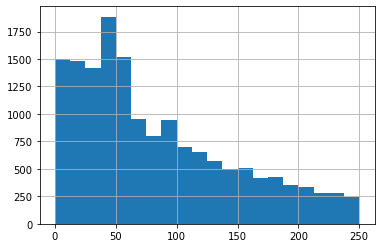

In [48]:
display(realty['days_exposition'].describe())
realty['days_exposition'].hist(bins=20, range=(0, 250))
plt.show()

В среднем квартира продается 180 дней, медианое значение 95 дней. Обычно продажа занимает от 1 до 95 дней. Можно считать что продали квартиру быстро до 45 дней, очень долго сверх 232 дней.

Убераем редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.

In [49]:
realty.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_of_m2,year,month,living_area_part,kitchen_area_part
count,23699.000000,23699.000000,23699.000000,23699.000000,18180.000000,23613.000000,21796.000000,23699.000000,21421.000000,23699.000000,...,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000,23699.000000,23699.000000,23699.000000,21796.000000,21421.000000
mean,9.858475,6541.548800,60.348635,2.070636,2.740847,10.673824,34.457878,5.892358,10.569754,0.591080,...,0.611408,490.804555,0.770255,517.980900,180.888634,99.421694,2017.367146,6.400101,0.564744,0.187314
std,5.682529,10887.012837,35.654086,1.078405,0.990965,6.597173,22.030420,4.885249,5.905448,0.959298,...,0.802074,342.317995,0.938346,277.720643,219.727988,50.306994,1.039771,3.491561,0.105426,0.073070
min,0.000000,12.000000,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,...,0.000000,1.000000,0.000000,13.000000,1.000000,0.112000,2014.000000,1.000000,0.020000,0.030000
25%,6.000000,3400.000000,40.000000,1.000000,2.600000,5.000000,18.600000,2.000000,7.000000,0.000000,...,0.000000,288.000000,0.000000,294.000000,45.000000,76.587000,2017.000000,3.000000,0.500000,0.130000
50%,9.000000,4650.000000,52.000000,2.000000,2.600000,9.000000,30.000000,4.000000,9.100000,0.000000,...,0.000000,455.000000,1.000000,502.000000,95.000000,95.000000,2017.000000,6.000000,0.570000,0.170000
75%,14.000000,6800.000000,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,1.000000,...,1.000000,612.000000,1.000000,729.000000,232.000000,114.262000,2018.000000,10.000000,0.640000,0.230000
max,50.000000,763000.000000,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,...,3.000000,3190.000000,3.000000,1344.000000,1580.000000,1907.500000,2019.000000,12.000000,1.000000,0.790000


In [50]:
realty = realty.query('2000 <= last_price <= 100000')
realty = realty.query('26 <= total_area <= 105')
realty = realty.query('12.5 <= living_area <= 63.5')
realty = realty.query('4.6 <= kitchen_area <= 18')
realty = realty.query('30 <= days_exposition <= 348')
realty = realty.query('51 <= price_of_m2 <= 172')

Убрали выбросы в толбцах цена прдажи, общая площадь, жилая площадь, площадь кухни, срок продажи, и цена заз квадратный метр. 

Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года

Зависимость 0.7689729665474855


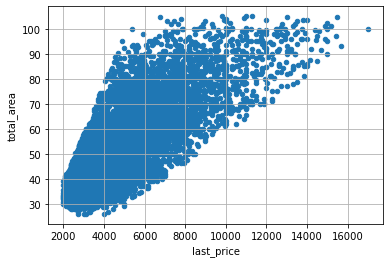

In [51]:
realty.plot(x='last_price', y='total_area', kind='scatter', grid=True) 
print('Зависимость', realty['last_price'].corr(realty['total_area']))

Зависимость 0.5003762188209828


<AxesSubplot:title={'center':'rooms'}, xlabel='rooms'>

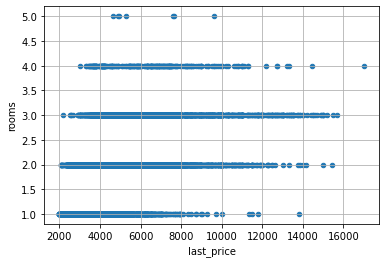

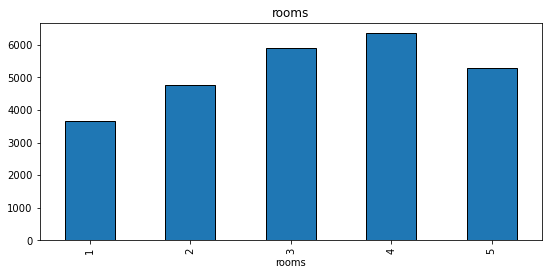

In [52]:
realty.plot(x='last_price', y='rooms', kind='scatter', grid=True) 
print('Зависимость', realty['last_price'].corr(realty['rooms']))
df_filtered = realty.groupby('rooms').median()['last_price'].reset_index().sort_values(by='rooms')
df_filtered.plot(x='rooms', y="last_price", kind='bar', ec='black', 
                            title='rooms', legend=None, figsize=(9,4))

Зависимость -0.3269025117702646


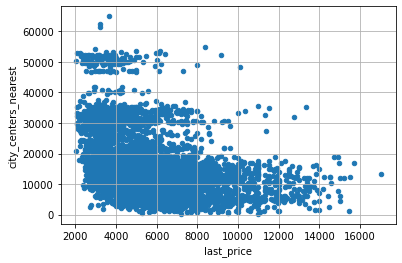

In [53]:
realty.plot(x='last_price', y='city_centers_nearest', kind='scatter', grid=True) 
print('Зависимость', realty['last_price'].corr(realty['city_centers_nearest']))

In [54]:
realty['level_id'] = np.where(realty['floor'] == 1, 1, 3)
realty['level_id'] = np.where(realty['floor'] == realty['floors_total'], '2', realty['level_id'])
realty['level_id'] = realty['level_id'].astype('int')
realty.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,apartment,...,days_exposition,centr_category,price_of_m2,year,month,day,level,living_area_part,kitchen_area_part,level_id
1,7,3350,40.4,2018-12-04,1,2.6,11.0,18.6,1,NaN,...,81.0,область,82.921,2018,12,4 - четверг,первый,0.46,0.27,1
5,10,2890,30.4,2018-09-10,1,NaN,12.0,14.4,5,NaN,...,55.0,None,95.066,2018,9,NaN,другой,0.47,0.30,3
8,20,2900,33.2,2018-05-23,1,NaN,27.0,15.4,26,NaN,...,189.0,None,87.349,2018,5,NaN,другой,0.46,0.27,3
9,18,5400,61.0,2017-02-26,3,2.5,9.0,43.6,7,NaN,...,289.0,в пределах города,88.525,2017,2,NaN,другой,0.71,0.11,3
10,5,5050,39.6,2017-11-16,1,2.7,12.0,20.3,3,NaN,...,137.0,в пределах города,127.525,2017,11,NaN,другой,0.51,0.21,3


Зависимость 0.10541709496230774


<AxesSubplot:title={'center':'level'}, xlabel='level'>

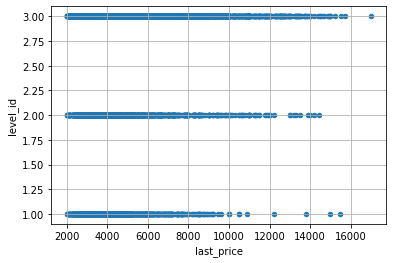

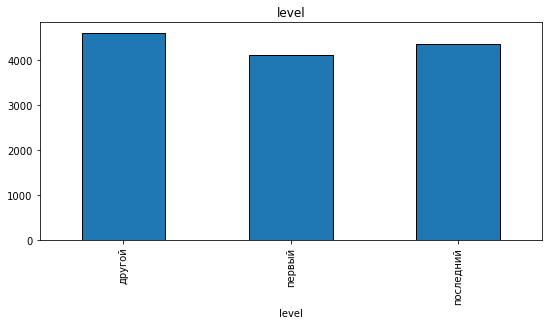

In [55]:
realty.plot(x='last_price', y='level_id', kind='scatter', grid=True) 
print('Зависимость', realty['last_price'].corr(realty['level_id']))
df_filtered = realty.groupby('level').median()['last_price'].reset_index().sort_values(by='level')
df_filtered.plot(x='level', y="last_price", kind='bar', ec='black', 
                            title='level', legend=None, figsize=(9,4))

Зависимость 0.028834987921390554


<AxesSubplot:title={'center':'year'}, xlabel='year'>

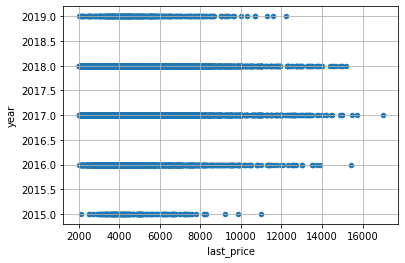

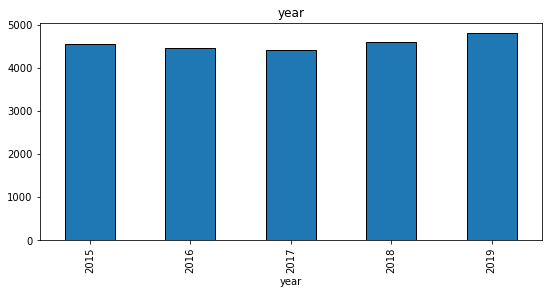

In [56]:
realty.plot(x='last_price', y='year', kind='scatter', grid=True)
print('Зависимость', realty['last_price'].corr(realty['year']))
df_filtered = realty.groupby('year').median()['last_price'].reset_index().sort_values(by='year')
df_filtered.plot(x='year', y="last_price", kind='bar', ec='black', 
                            title='year', legend=None, figsize=(9,4))

Зависимость 0.005755796019451219


<AxesSubplot:title={'center':'month'}, xlabel='month'>

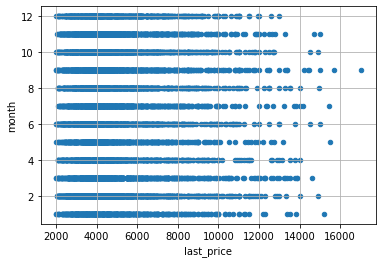

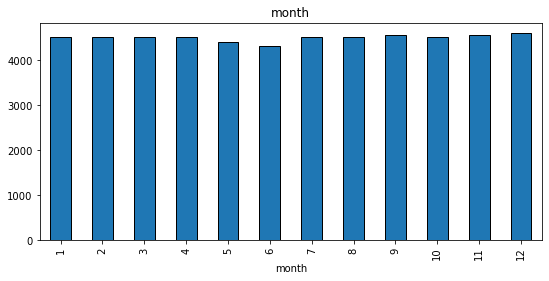

In [57]:
realty.plot(x='last_price', y='month', kind='scatter', grid=True)
print('Зависимость', realty['last_price'].corr(realty['month']))
df_filtered = realty.groupby('month').median()['last_price'].reset_index().sort_values(by='month')
df_filtered.plot(x='month', y="last_price", kind='bar', ec='black', 
                            title='month', legend=None, figsize=(9,4))

<AxesSubplot:title={'center':'day'}, xlabel='day'>

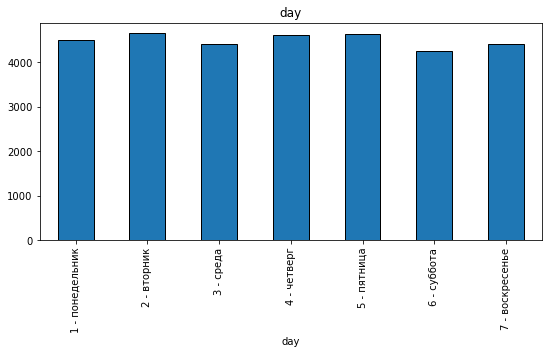

In [58]:
df_filtered = realty.groupby('day').median()['last_price'].reset_index().sort_values(by='day')
df_filtered.plot(x='day', y="last_price", kind='bar', ec='black', 
                            title='day', legend=None, figsize=(9,4))

Мы видим что больше всего на стоимость квартир влияет площадь квартиры, количество комнат, чуть меньше влияние оказывает удаленность и этаж квартиры.

Видимо что есть динамика продаж квартир, с 2015 по 2019 года появляется все больше кваритр в продаже. В феврале и в июле есть всплеск, скорее всего связан с январскими праздниками и летними каникулами и отпусками. В понедельник больше размещений чем в другие дни недели.

In [59]:
top10 = realty['locality_name'].value_counts().index.tolist()[:10]
mean10_metrics = [realty[realty['locality_name'] == city]['price_of_m2'].median().round(2) for city in top10]
mean10_prices = [realty[realty['locality_name'] == city]['last_price'].median() for city in top10]
frame = {'Город': top10, 'Средняя цена за кв.м., тыс. руб.': mean10_metrics, 'Средняя цена за квартиру, тыс. руб.': mean10_prices}
dataframe = pd.DataFrame(frame).sort_values(by='Средняя цена за кв.м., тыс. руб.', ascending=False)
dataframe

AttributeError: 'float' object has no attribute 'round'

Как и ожидалось, самые дорогие квартиры (что за всё жилье, что за 1 кв.м.) в Санкт-Петербурге и парковом городе Пушкине. Чем дальше от города, тем дешевле. В Выборге средняя цена за квадратный метр в 2 раз ниже, чем в Санкт-Петербурге.

In [ ]:
piter = realty.loc[realty['locality_name']=='Санкт-Петербург',['price_of_m2', 'city_centers_nearest']].reset_index(drop=True)
piter['dist_c_km'] = (piter['city_centers_nearest']/1000).round()
piter.head()

In [ ]:
piter_km_price = piter.pivot_table(index='dist_c_km', values=('price_of_m2'), aggfunc='mean')
piter_km_price.head()

In [ ]:
piter_km_price.plot(kind='bar', grid=True, figsize=(14,8));

Делаем вывод что центральная часть Петербурга от 0 до 8 км

In [ ]:
#квартиры в центре
spb_cen = realty[['total_area', 'last_price', 'rooms', 'ceiling_height', 'floor', 'city_centers_nearest', 'days_exposition','locality_name']]
spb_center = spb_cen.query('city_centers_nearest < 8000 ')
display(spb_center.describe().round())
display('СПБ - ЦЕНТР')

#квариры во всем СПБ
spb_a = realty[['total_area', 'last_price', 'rooms', 'ceiling_height', 'floor', 'city_centers_nearest', 'days_exposition','locality_name']]
spb_all = spb_a.query('locality_name == "Санкт-Петербург" ')
display(spb_all.describe().round())
display('СПБ - ВЕСЬ')

- total_area Центр/СПБ: средняя площадь 63/53 квм, медиана 62/50 квм
- last_price Центр/СПБ: средняя стоимость 7/5.5 млн, мининальная 2.75/2.2 млн
- rooms Центр/СПБ: среднее кол-во комнат 2/2 
- ceiling_height Центр/СПБ: средняя высота потолков 3/3 м.

Вывод: данные соответствуют действительности. В центре действительно средняя площадь и среднее кол-во комнат выше, чем во всё Санкт-Петербурге. Также средняя стоимость и средняя высота потолков соответствуют значениям квартир в центре города.

In [ ]:
#'СПБ - ЦЕНТР'
corr = spb_center.corr()
figsize=(10, 8)
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

corr

Теснота корреляционной связи Площади и Цены высокая- именно общая площадь больше всего влияет на цену.

Далее по степени убывания корреляционной связи:
- кол-во комнат
- высота потолков
- этаж
- дата размещения объявления 
- удаленность от центра

In [ ]:
#'СПБ - Весь'
corr_all = spb_all.corr()
figsize=(10, 8)
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

corr_all

Теснота корреляционной связи Площади и Цены высокая - общая площадь во всём Санкт-Петербрурге больше всего влияет на цену. Корреляция в целом по городу даже выше, чем только по Центру.

Далее по степени убывания корреляционной связи:
- кол-во комнат
- высота потолков 
- этаж 
- дата размещения объявления 
- удаленность от центра

Кол-во комнат напрямую зависит от общей площади, поэтому вполне естественно, что и у кол-во комнат во всём городе корреляция с ценой также будет выше, чем в центре. Высота потолков имеет бОльшее влияние на цену, чем в центре. Этажность, дата размещения и удаленность от центра - всё ещё имеют низкую тесноту корреляционной связи с ценой.

## Общий вывод

Для анализа был получен dataset, состоящий из 22 колонок и 23699 строк. Часть колонок не пригодилась для анализа (total_images, open_plan, balcony, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest), но по мере возможностей была также обработана на этапе предобработки.
На этапе предобработки была удалена 181 строка. Заменены типы файлов. Удалены выбросы
Больше всего квартир в продаже с площадью от 30 до 45 квм (1к и 2к квартиры).
Больше всего квартир продаётся по цене от 1,8 млн до 7 млн. Пик продаж находится в диапазоне цен от 3 до 5 млн.
Больше всего 1к квартир (более 8 тысяч), далее идут 2к квартиры (чуть меньше 8 тысяч),
Больше всего квартир с высотой потолков 250см (более 5,5 тысяч), однако квартир с высотой 265см не многим меньше (5000).
Продажа квартиры занимает от 1,5 до 3 месяцев. Продажа в срок до 45 дней может считаться быстрой продажей, так как произошла в период до первого пикового значения. Продажи сроком более 199 дней можно считать долгими.
Высокая зависимость цены от площади - коэффициента корреляции Пирсона. Умеренная зависимость цены от количества комнат.
Цена не зависит от удаленности от центра (при анализе всего датасета, включающего Санкт-Петербург и ЛО).
Центральная зона Санкт-Петербурга с 0 до 8 км.
Несмотря на полное отсутствие корреляции, средняя цена в Четверг равна 6,5 млн, почти на 400 тыс выше, чем в значениях средних цен Воскресенья. А средняя цена в Декабре равна 6,6 млн, на 600 тыс выше, чем в значениях средних цен Октября. Резкое падение средних цен в 2014/2015 годах, затем умеренное снижение до 2019 года (рост цен).
Самая высокая стоимость жилья: Санкт-Петербург. Самая низкая стоимость жилья: Выборг.
Площадь, Центр/СПБ: средняя площадь 63/53квм, медиана 62/50квм Цена, Центр/СПБ: средняя стоимость 7млн/5.5млн, мининальная 2.75/2.2 млн Комнаты, Центр/СПБ: среднее кол-во комнат 3/3 Потолки, Центр/СПБ: средняя высота потолков 3/3 м
Этажность, дата размещения и удаленность от центра - имеют низкую тесноту корреляционной связи с ценой как в Санкт-Петербурге в целом, так и в центре города.

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: «Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?»
- [x]  выполнено задание: «Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили».
- [x]  выполнено задание: «Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года». 
- [x]  выполнено задание: «Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце `locality_name`».
- [x]  выполнено задание: «Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (`locality_name`). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона».
- [x]  выполнено задание: «Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всей базе?»
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод